<a href="https://colab.research.google.com/github/21f21512/Football_Vs_Rugby/blob/main/football_vs_rugby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Football Vs Rugby/Train"
test_dir = "/content/drive/MyDrive/Football Vs Rugby/Test"

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Football Vs Rugby/Train/Rugby')))
print(len(os.listdir('/content/drive/MyDrive/Football Vs Rugby/Train/Soccer')))
print(len(os.listdir('/content/drive/MyDrive/Football Vs Rugby/Test/Rugby')))
print(len(os.listdir('/content/drive/MyDrive/Football Vs Rugby/Test/Soccer')))

428
428
100
100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 686 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 367s 16s/step - accuracy: 0.4436 - loss: 1.2297 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.5075 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.7741
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.5819 - loss: 0.6695 - val_accuracy: 0.5588 - val_loss: 0.6799
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.7213 - loss: 0.5782 - val_accuracy: 0.6118 - val_loss: 0.6881
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 130s 5s/step - accuracy: 0.7880 - loss: 0.4419 - val_accuracy: 0.6294 - val_loss: 0.7154
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.8372 - loss: 0.3387 - val_accuracy: 0.5647 - val_loss: 0.9352
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.9452 - loss: 0.1644 - val_accuracy: 0.6059 - val_loss: 1.3410
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 120s 5s/step - accuracy: 0.9751 - loss: 0.0805 - val_accuracy: 0.6176 - 

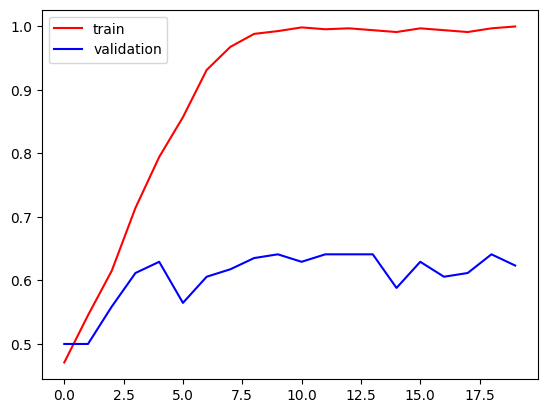

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

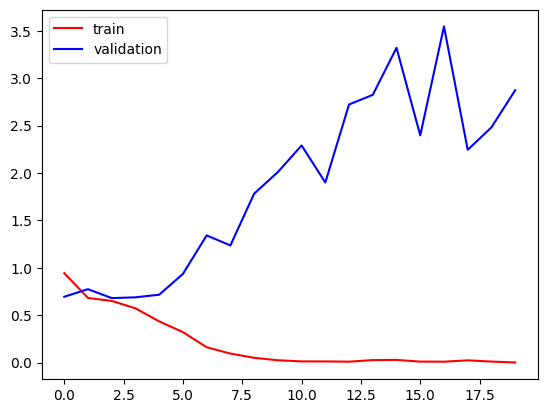

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 7s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[56 44]
 [64 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       100
           1       0.45      0.36      0.40       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.45       200
weighted avg       0.46      0.46      0.45       200



In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 201s 9s/step - accuracy: 0.5703 - loss: 5.0601 - val_accuracy: 0.5176 - val_loss: 4.3983
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 204s 9s/step - accuracy: 0.6820 - loss: 3.5719 - val_accuracy: 0.5647 - val_loss: 3.9462
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 191s 9s/step - accuracy: 0.7386 - loss: 2.9377 - val_accuracy: 0.5647 - val_loss: 2.6908
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 187s 9s/step - accuracy: 0.7509 - loss: 1.7912 - val_accuracy: 0.5000 - val_loss: 10.4565
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 191s 9s/step - accuracy: 0.8472 - loss: 1.0558 - val_accuracy: 0.5059 - val_loss: 5.0434
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.8469 - loss: 1.0473 - val_accuracy: 0.5647 - val_loss: 3.6430
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 185s 8s/step - accuracy: 0.8565 - loss: 1.0865 - val_accuracy: 0.5765 - val_loss: 3.3476
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 201s 9s/step - accuracy: 0.8710 - loss: 0.7527 - val_accuracy: 0.6000 - 

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[43 57]
 [42 58]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.51      0.43      0.46       100
           1       0.50      0.58      0.54       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 279s 12s/step - accuracy: 0.4993 - loss: 3.5713 - val_accuracy: 0.5118 - val_loss: 0.9335
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 324s 13s/step - accuracy: 0.5730 - loss: 0.8387 - val_accuracy: 0.7353 - val_loss: 0.5688
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 231s 11s/step - accuracy: 0.6714 - loss: 0.5983 - val_accuracy: 0.6176 - val_loss: 0.6096
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 266s 12s/step - accuracy: 0.6757 - loss: 0.5888 - val_accuracy: 0.6941 - val_loss: 0.5605
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 265s 12s/step - accuracy: 0.7080 - loss: 0.5523 - val_accuracy: 0.7000 - val_loss: 0.5728
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 231s 11s/step - accuracy: 0.7150 - loss: 0.5568 - val_accuracy: 0.7059 - val_loss: 0.5586
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 230s 11s/step - accuracy: 0.7330 - loss: 0.5418 - val_accuracy: 0.7000 - val_loss: 0.5867
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 231s 11s/step - accuracy: 0.7587 - loss: 0.5234 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 60s 8s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[39 61]
 [43 57]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       100
           1       0.48      0.57      0.52       100

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

